In [1]:
import pandas as pd
from pandas import DataFrame
from numpy import random
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

# Example 1: CDF

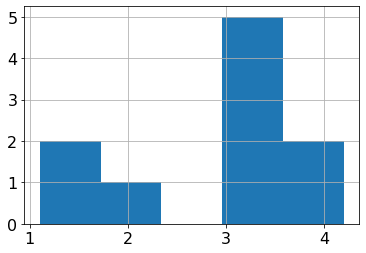

In [4]:
vals = [1.1,1.2,4.1,4.2,2.1,3.1,3.2,3.3,3.4,3.5]
pd.Series(vals).hist(bins=5)

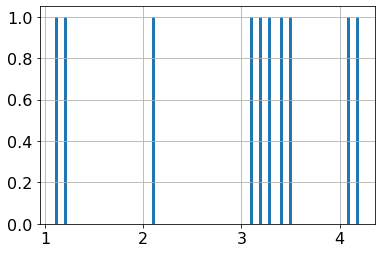

In [5]:
pd.Series(vals).hist(bins=100)

In [6]:
def make_cdf(vals):
    s = pd.Series(sorted(vals))
    s = s.sort_values()
    return pd.Series(100*(s.index+1)/len(s), index=s.values)
cdf = make_cdf(vals)
cdf

1.1     10.0
1.2     20.0
2.1     30.0
3.1     40.0
3.2     50.0
3.3     60.0
3.4     70.0
3.5     80.0
4.1     90.0
4.2    100.0
dtype: float64

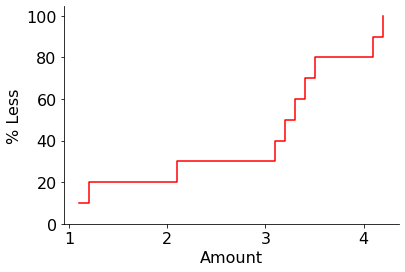

In [7]:
ax=None
#ax = cdf.plot.line(ylim=0, color="red", ax=ax) # OK FOR LOTS OF DATA
#ax = cdf.plot.line(ylim=0, color="red", drawstyle='steps-pre', ax=ax) # WRONG
ax = cdf.plot.line(ylim=0, color="red", drawstyle='steps-post', ax=ax)
ax.set_xlabel("Amount")
ax.set_ylabel("% Less")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

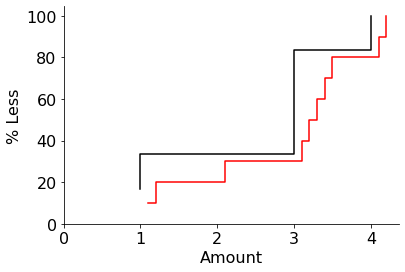

In [8]:
ax = cdf.plot.line(ylim=0, color="red", drawstyle='steps-post')
make_cdf([1,1,3,3,3,4]).plot.line(xlim=0, ylim=0, color="black", drawstyle='steps-post', ax=ax)

ax.set_xlabel("Amount")
ax.set_ylabel("% Less")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Example 2: Tufte Style Box+Whiskers

In [9]:
df = DataFrame(random.normal(5, 1, size=(25,8)), columns=list("ABCDEFGH"))
df

,A,B,C,D,E,F,G,H
0,5.673723,5.350848,3.706999,5.386281,4.882916,7.040084,5.642880,3.780056
1,4.000457,5.935677,3.712129,7.062567,5.451883,3.625814,5.747871,4.685651
2,3.934572,7.222942,4.640507,6.662661,4.923685,3.659099,6.198518,4.701759
3,5.500908,5.972931,3.433583,6.039434,5.161388,6.114416,6.343519,5.632857
4,6.652920,4.109880,5.591843,5.965932,4.982607,2.835844,5.284197,6.095679
5,4.203173,5.466847,4.107447,4.472139,4.804079,4.683976,4.991281,4.578814
6,5.259705,6.301907,5.729727,4.118111,5.085931,6.714022,6.352428,5.356471
7,6.205733,5.216797,5.822170,3.260213,5.005191,5.809993,4.409790,5.333438
8,5.733570,6.784950,6.095687,4.763465,4.171762,5.993901,4.484329,5.608249
9,3.863499,4.555640,4.511142,4.283416,5.348943,4.772973,4.708063,4.114339


In [10]:
df.mean(axis=0)

A    5.144853
B    5.175574
C    4.892035
D    4.907376
E    4.929308
F    4.859356
G    5.332179
H    4.971854
dtype: float64

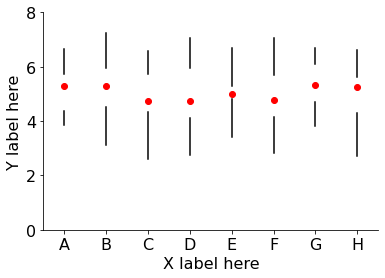

In [11]:
ax = plt.subplots()[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("X label here")
plt.ylabel("Y label here")

ax.set_xlim(0.5, len(df.columns)+0.5)
ax.set_ylim(0, 8)
ax.set_xticklabels(list(df.columns))
ax.set_xticks(range(1, len(df.columns)+1))

for i, col in enumerate(df.columns):
    s = df[col]

    # mean
    x = i+1
    y = s.quantile(0.5)
    ax.plot(x, y, 'ro')

    y1 = s.quantile(0.75)
    y2 = s.quantile(1)
    ax.plot((x, x), (y1, y2), 'k')

    y1 = s.quantile(0)
    y2 = s.quantile(0.25)
    ax.plot((x, x), (y1, y2), 'k')

# Example 3: Std Dev Ranges

In [12]:
dfs = []

for i in range(5):
    df = DataFrame()
    df["x"] = list(range(4))
    df["A"] = df["x"] + random.normal(size=4) * 0.2
    df["B"] = 2 + random.normal(size=4) * 0.3
    df["trial"] = i
    dfs.append(df)

In [13]:
df = pd.concat(dfs)
df

,x,A,B,trial
0,0,0.336354,2.223233,0
1,1,0.614455,2.059806,0
2,2,2.170306,2.195044,0
3,3,2.879907,1.920072,0
0,0,-0.195620,2.183525,1
1,1,0.893468,1.769111,1
2,2,1.935641,2.196362,1
3,3,2.977370,1.756434,1
0,0,0.128264,2.078199,2
1,1,1.286915,2.686127,2


In [14]:
df = df.set_index(["trial", "x"])
df

A         B
trial x                    
0     0  0.336354  2.223233
      1  0.614455  2.059806
      2  2.170306  2.195044
      3  2.879907  1.920072
1     0 -0.195620  2.183525
      1  0.893468  1.769111
      2  1.935641  2.196362
      3  2.977370  1.756434
2     0  0.128264  2.078199
      1  1.286915  2.686127
      2  2.042223  1.680272
      3  2.655242  2.035528
3     0 -0.175574  1.477497
      1  1.244934  2.118037
      2  2.064540  2.229224
      3  3.295998  1.789473
4     0 -0.101926  1.692401
      1  0.945816  1.988314
      2  1.816453  1.753496
      3  2.825788  1.944919

In [15]:
df.mean(axis=1)

trial  x
0      0    1.279793
       1    1.337131
       2    2.182675
       3    2.399989
1      0    0.993953
       1    1.331290
       2    2.066001
       3    2.366902
2      0    1.103232
       1    1.986521
       2    1.861248
       3    2.345385
3      0    0.650962
       1    1.681485
       2    2.146882
       3    2.542735
4      0    0.795237
       1    1.467065
       2    1.784975
       3    2.385353
dtype: float64

In [16]:
df.mean(axis=0)

A    1.482028
B    1.988854
dtype: float64

In [17]:
mean = df.mean(level=1)
mean

,A,B
x,,
0,-0.001700,1.930971
1,0.997117,2.124279
2,2.005833,2.010880
3,2.926861,1.889285


In [18]:
std = df.std(level=1)
std

,A,B
x,,
0,0.228612,0.329177
1,0.276225,0.340771
2,0.134735,0.269973
3,0.237176,0.115154


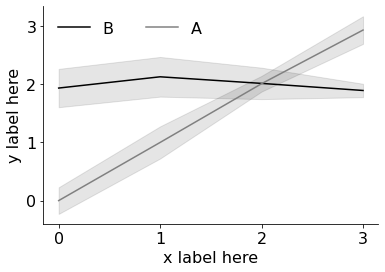

In [19]:
ax = None
colors = ["black", "gray"]
for col in reversed(df.columns):
    ax = mean[col].plot.line(color=colors.pop(0), ax=ax)
    plt.fill_between(mean.index, mean[col]-std[col], mean[col]+std[col],
                     color='black', alpha=0.1)

ax.legend(frameon=False, ncol=2)
ax.set_xlabel("x label here")
ax.set_ylabel("y label here")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)